In [1]:
import numpy as np
from scipy.stats import linregress

import pandas as pd

import matplotlib.pyplot as plt

</br></br></br>

# Median Sales Price of Houses Sold in the USA 

Source: [Economic Research](https://fred.stlouisfed.org/series/MSPUS)

In [2]:
mspus_df = pd.read_csv("MSPUS.csv")

mspus_df["DATETIME"] = pd.to_datetime(
    mspus_df["DATE"], format='%Y-%m-%d', errors='coerce')
mspus_df["Day"] = (mspus_df["DATETIME"] - mspus_df["DATETIME"].iloc[0]).dt.days

display(mspus_df.transpose())
display(mspus_df.describe().transpose())

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
DATE,1963-01-01,1963-04-01,1963-07-01,1963-10-01,1964-01-01,1964-04-01,1964-07-01,1964-10-01,1965-01-01,1965-04-01,...,2021-01-01,2021-04-01,2021-07-01,2021-10-01,2022-01-01,2022-04-01,2022-07-01,2022-10-01,2023-01-01,2023-04-01
MSPUS,17800.0,18000.0,17900.0,18500.0,18500.0,18900.0,18900.0,19400.0,20200.0,19800.0,...,369800.0,382600.0,411200.0,423600.0,433100.0,449300.0,468000.0,479500.0,429000.0,416100.0
DATETIME,1963-01-01 00:00:00,1963-04-01 00:00:00,1963-07-01 00:00:00,1963-10-01 00:00:00,1964-01-01 00:00:00,1964-04-01 00:00:00,1964-07-01 00:00:00,1964-10-01 00:00:00,1965-01-01 00:00:00,1965-04-01 00:00:00,...,2021-01-01 00:00:00,2021-04-01 00:00:00,2021-07-01 00:00:00,2021-10-01 00:00:00,2022-01-01 00:00:00,2022-04-01 00:00:00,2022-07-01 00:00:00,2022-10-01 00:00:00,2023-01-01 00:00:00,2023-04-01 00:00:00
Day,0,90,181,273,365,456,547,639,731,821,...,21185,21275,21366,21458,21550,21640,21731,21823,21915,22005


,count,mean,min,25%,50%,75%,max,std
MSPUS,242.0,150280.991736,17800.0,53575.0,126900.0,228625.0,479500.0,111227.130197
DATETIME,242,1993-02-14 12:00:00,1963-01-01 00:00:00,1978-01-23 12:00:00,1993-02-15 00:00:00,2008-03-09 06:00:00,2023-04-01 00:00:00,NaN
Day,242.0,11002.5,0.0,5501.5,11003.0,16504.25,22005.0,6392.202207


In [3]:
# Range of dates to fit to:
strt_date = "1990-01-01"
end_date =  "2018-01-01"

strt_day_idx = mspus_df.index[mspus_df["DATETIME"] <= strt_date][-1]
end_day_idx = mspus_df.index[mspus_df["DATETIME"] <= end_date][-1]

print("Dates:")
print(f"\tStart Date:  {mspus_df['DATE'].iloc[strt_day_idx]}")
print(f"\tEnd Date:    {mspus_df['DATE'].iloc[end_day_idx]}")


# Linear fitting to log prices:
x = mspus_df["Day"].to_numpy()
log_price = np.log(mspus_df["MSPUS"].to_numpy())

fit_results = linregress(x[strt_day_idx:end_day_idx], log_price[strt_day_idx:end_day_idx])
fit_points = np.exp(fit_results[0] * x + fit_results[1])

print("Percentage Devaitino of Current Price from Expected: {} %".format(
    np.around(100 * (np.exp(log_price)[-1] - fit_points[-1]) / np.exp(log_price)[-1], 2)))

Dates:
	Start Date:  1990-01-01
	End Date:    2018-01-01
Percentage Devaitino of Current Price from Expected: 5.37 %


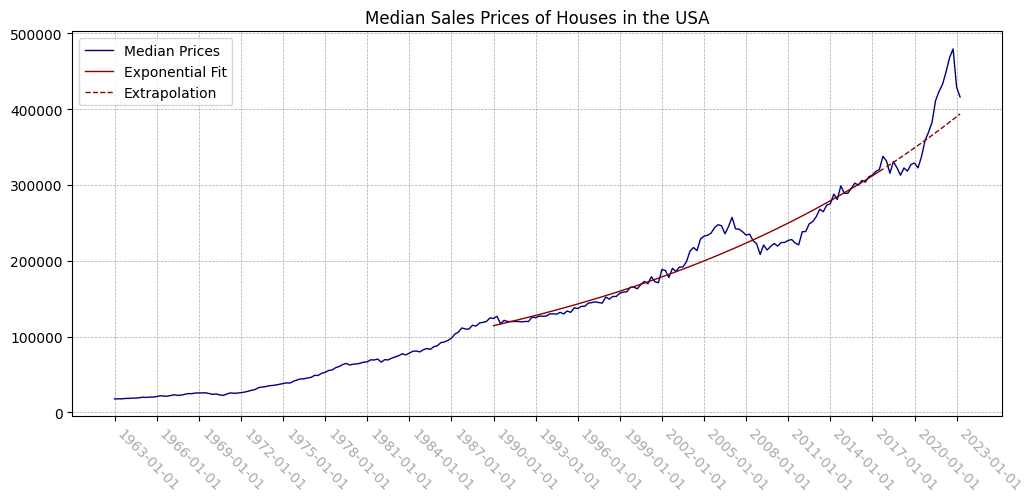

In [6]:
# Plot results
fig = plt.figure(figsize=(12.0, 5.0))
ax = plt.gca()

ax.set_title("Median Sales Prices of Houses in the USA")
ax.plot(mspus_df["Day"], mspus_df["MSPUS"], lw=1.0, ls="-", c="navy", label="Median Prices")
ax.plot(x[strt_day_idx:end_day_idx], fit_points[strt_day_idx:end_day_idx], 
        lw=1.0, ls="-", c="darkred", label="Exponential Fit")
ax.plot(x[end_day_idx:], fit_points[end_day_idx:], 
        lw=1.0, ls="--", c="darkred", label="Extrapolation")
ax.legend(loc="upper left")
ax.grid(lw=0.5, ls="--", color="darkgrey")
ax.set_xticks(mspus_df["Day"][::12])
ax.set_xticklabels(mspus_df["DATE"][::12], rotation=-45, ha="left", va="top", color="darkgrey")
ax.set_axisbelow("True")
# ax.set_xlim(x[strt_day_idx],)

plt.show()